In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [2]:
from sqlalchemy import create_engine


driver = 'mysql+pymysql:'
user = 'adria'
password = '00000'
ip = '35.187.114.125'
database = 'vimet'

connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

In [44]:
items = pd.read_sql('items', con = engine)
orders = pd.read_sql('orders', con = engine)
customer = pd.read_sql('customers', con = engine)

In [45]:
items = items.merge(orders[['Name', 'Customer']], how='left', on='Name').dropna()

In [46]:
customer.head()

,index,Customer,Accepts Marketing,Shipping City,customer_class
0,0,1,1,Barcelona,regular
1,1,2,1,Barcelona,casual
2,2,3,1,Barcelona,preferred
3,3,4,1,Barcelona,casual
4,4,5,1,Barcelona,preferred


In [42]:
items.merge(customer[['Customer','customer_class']])

,index,Name,Lineitem quantity,Lineitem name,Lineitem price,Lineitem fulfillment status,Cancelled at,Refunded Amount,Vendor,Lineitem discount,tags,Customer
7,7,#1247,1,Manzana Golden - 4 unidades,2.00,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Manzana,1.0
8,8,#1247,1,Fresón Maresme - 1 caja (500 grs.),3.50,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Fresón,1.0
9,9,#1247,1,Kiwi Green - 4 unidades,2.45,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Kiwi,1.0
10,10,#1247,1,Plátano Canarias Verde - 3/4 unidades,1.75,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Plátano,1.0
11,11,#1247,1,Cebolla Morada - 1 Kg. (3/4 uds),1.50,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Cebolla,1.0


### Create a data frame that contains the total quantity of each product purchased by each order

In [19]:
rec = items.groupby(['Customer', 'tags']).sum()[['Lineitem quantity']]

### Create a product by order matrix

In [22]:
df_pivot = rec.pivot_table(index='tags', columns='Customer', values='Lineitem quantity').fillna(0)
df_pivot.head()

Customer,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,42.0,43.0,44.0,45.0,46.0,47.0,48.0,50.0,51.0,53.0
tags,,,,,,,,,,,,,,,,,,,,,
Aceite,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acelgas,1.0,3.0,0.0,4.0,0.0,2.0,2.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Agua,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aguacate,0.0,2.0,1.0,8.0,1.0,2.0,2.0,0.0,2.0,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0
Ajo,0.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Create an order similarity matrix

In [47]:
from scipy.spatial.distance import pdist, squareform
similarity_matrix = squareform(pdist(df_pivot.T, 'cosine'))
similarity_matrix[0]

array([0.        , 0.31814561, 0.48187717, 0.3977632 , 0.54732686,
       0.3199365 , 0.4660508 , 0.43955586, 0.59060066, 0.325718  ,
       0.52628901, 0.39898463, 0.5848266 , 0.35229471, 0.48438142,
       0.40745858, 0.58235749, 0.57892356, 0.89181723, 0.54893978,
       0.60396079, 0.51890319, 0.89181723, 0.89181723, 0.50810119,
       0.5766083 , 0.47711663, 0.47950542, 0.47936299, 0.54624335,
       0.68902264, 0.89181723, 0.80450023, 0.64340559, 0.60415173,
       0.67729336, 0.61134422, 0.80647678, 0.77996699, 0.46723392,
       1.        , 0.68266388, 0.96393908, 0.57674797, 0.84774219,
       1.        , 0.96393908, 0.91822152, 0.97450108, 1.        ,
       0.73476284, 0.96393908])

In [48]:
similarity_df = pd.DataFrame(similarity_matrix, index=df_pivot.columns, columns=df_pivot.columns)

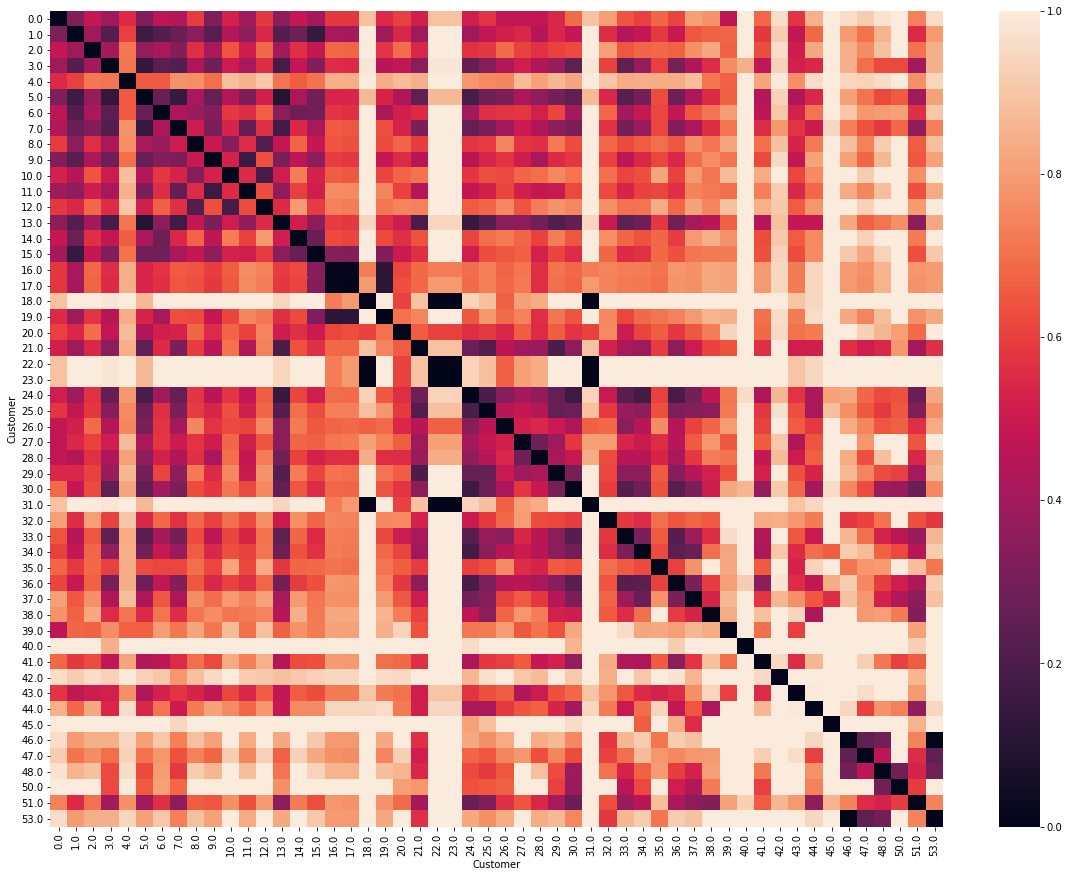

In [50]:
plt.figure(figsize=(20,15))
sns.heatmap(similarity_df)

plt.show()

In [ ]:
# Should we cluster now?